In [2]:
import cv2
import numpy as np
import pyglet
from ffpyplayer.player import MediaPlayer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [18]:
img=cv2.imread('Anas.jpg',cv2.IMREAD_COLOR)
bigger = cv2.resize(img, (500, 600))
cv2.imshow("image", bigger)
cv2.waitKey(0)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
cv2.imshow('Grayscale', gray_image)
filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, gray_image)
cv2.waitKey(0) 

-1

In [3]:
cap = cv2.VideoCapture('open.mp4')
if (cap.isOpened()== False):
  print("Error opening video stream or file")
while(cap.isOpened()):
     ret, frame = cap.read()
     if ret == True:
        cv2.imshow('Frame',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
     else:
        break
cap.release()
cv2.destroyAllWindows()
        
            
          






In [4]:
# import the opencv library
import cv2


vid = cv2.VideoCapture(0)

while(True):
	
	# Capture the video frame
	# by frame
	ret, frame = vid.read()

	# Display the resulting frame
	cv2.imshow('frame', frame)
	
	# the 'q' button is set as the
	# quitting button you may use any
	# desired button of your choice
	if cv2.waitKey(1) & 0xFF == ord('q'):
		break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()


In [5]:

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Alaa.mp4', fourcc, 20.0, (640, 480))

# loop runs if capturing has been initialized.
while(True):
  # reads frames from a camera
  # ret checks return at each frame
  ret, frame = cap.read()

  # Converts to HSV color space, OCV reads colors as BGR
  # frame is converted to hsv
  hsv = frame
  
  # output the frame
  out.write(hsv)
  
  # The original input frame is shown in the window
  cv2.imshow('Original', frame)

    # Wait for 'a' key to stop the program
  if cv2.waitKey(1) & 0xFF == ord('a'):
    break

# Close the window / Release webcam
cap.release()

# After we release our webcam, we also release the output
out.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()

In [7]:
video_path="open.mp4"
def PlayVideo(video_path):
    video=cv2.VideoCapture(video_path)
    player = MediaPlayer(video_path)
    while True:
        grabbed, frame=video.read()
        audio_frame, val = player.get_frame()
        if not grabbed:
            print("End of video")
            break
        if cv2.waitKey(28) & 0xFF == ord("q"):
            break
        cv2.imshow("Video", frame)
        if val != 'eof' and audio_frame is not None:
            #audio
            img, t = audio_frame
    video.release()
    cv2.destroyAllWindows()
PlayVideo(video_path)

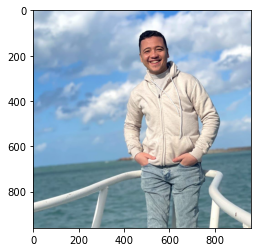

In [10]:
img = mpimg.imread('Anas.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
img = cv2.imread('Anas.jpg', cv2.IMREAD_UNCHANGED)

#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 180
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 2555, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
#save image
cv2.imwrite('contours.jpg',img_contours) 

True

In [19]:
# Convert to graycsale

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

# Display Canny Edge Detection Image

cv2.imshow('Canny Edge Detection', edges)

cv2.waitKey(0)


-1

In [27]:
median = cv2.medianBlur(img,15)
cv2.imshow('median', median)

cv2.waitKey(0)

-1

In [31]:
# Apply identity kernel

kernel1 = np.array([[0, 0, 0],

                    [0, 1, 0],

                    [0, 0, 0]])

#kernel2 = np.ones((5, 5), np.float32) / 25


identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel1)

 

cv2.imshow('Original', img)

cv2.imshow('Identity', identity)

     

cv2.waitKey()


-1

In [32]:
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("path/to/files/*.png")]

In [3]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')
cam = cv2.VideoCapture(0)
ret = True
while ret:
    ret, frame = cam.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face_points = face_detector.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in face_points:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 20), 2)
        
            face = frame[y:y+h,x:x+w]
            eyes = eye_detector.detectMultiScale(face,1.3,5)
            for (x, y, w, h) in eyes:
                cv2.rectangle(face, (x, y), (x+w, y+h), (155, 0, 120), 2)
        cv2.imshow('Live feed', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()